In [1]:
import tensorflow as tf
from tensorflow.nn import avg_pool2d, max_pool2d
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import TensorBoard

C:\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
new_model=tf.keras.models.load_model(
    "D:\colab_model.h5",
    custom_objects=None,
    compile=True
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1000)              25636712  
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               256256    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 25,893,482
Trainable params: 25,840,362
Non-trainable params: 53,120
_________________________________________________________________


In [4]:
from PIL import Image
image = Image.open('farm.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
#image.show()
#size = 224, 224
#image.thumbnail(size, Image.ANTIALIAS)

JPEG
RGB
(320, 180)


In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255)

train= train_datagen.flow_from_directory('C:/Users/G5/Desktop/img',
                                                 target_size = (224, 224),
                                                 batch_size = 9999,
                                                 class_mode = 'binary')
img_array,y=train.next()
print(img_array.shape)


Found 12 images belonging to 1 classes.
(12, 224, 224, 3)


In [21]:
tf.keras.preprocessing.image.array_to_img(img_array[4]).show()

(224, 224, 3)


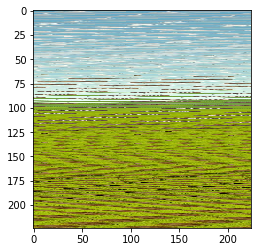

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
img_array=tf.keras.preprocessing.image.img_to_array(image)
# print(img_array)
#print(img_array)
img_array=img_array/255.
#print(img_array)
img_array.resize([224,224,3])
print(img_array.shape)
#img2=tf.keras.preprocessing.image.array_to_img(img_array)
plt.imshow(img_array)
#print(img2.mode)

In [22]:
inputt=[]
inputt.append([img_array[4]])
arr=new_model.predict(inputt)
print(arr)

[[0.0070794 0.9929206]]


In [23]:
if(arr[0][0]>arr[0][1]):
    print("organic")
else:
    print("recyclable")

recyclable


Note: you may need to restart the kernel to use updated packages.
